In [1]:
import numpy as np
import matplotlib.pyplot as plt

Note that we have a scalar conservation law 
$$u_t+f(u)_x = 0$$
with $f(u) = 2u$.
Therefore, the CFL condition is 
$$
\max_j \abs{f'(U_j^n)}\frac{\dt}{\dx} = 2\frac{\dt}{\dx} \leq \frac{1}{2},
$$
therefore we can choose $\dt = \frac{1}{4}\dx$.
The Godunov flux is therefore
$$
F_{j+\frac{1}{2}}=\begin{cases}
    \min_{U_j^n\leq\theta\leq U_{j+1}^n} f(\theta)
\end{cases}
$$


In [6]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
np.concatenate(([0], A))

array([0, 1, 2, 3])

[ 0.00000000e+00  0.00000000e+00  3.20822562e-01  6.33335988e-01
  9.29446344e-01  1.20148453e+00  1.44240489e+00  1.64596773e+00
  1.80690087e+00  1.92103622e+00  1.98541775e+00  1.95958130e+00
  1.87003249e+00  1.73205081e+00  1.54920992e+00  1.32624532e+00
  1.06893165e+00  7.83933220e-01  4.78631329e-01  1.60933137e-01
 -1.60933137e-01 -4.78631329e-01 -7.83933220e-01 -1.06893165e+00
 -1.32624532e+00 -1.54920992e+00 -1.73205081e+00 -1.87003249e+00
 -1.95958130e+00 -1.99837800e+00 -1.99837800e+00 -1.98541775e+00
 -1.92103622e+00 -1.80690087e+00 -1.64596773e+00 -1.44240489e+00
 -1.20148453e+00 -9.29446344e-01 -6.33335988e-01 -3.20822562e-01
 -4.89858720e-16]
[ 0.          0.          0.16041128  0.47707927  0.78139117  1.06546544
  1.32194471  1.54418631  1.7264343   1.86396855  1.95322699  2.00435571
  1.93902332  1.82347125  1.66069223  1.45490215  1.21143087  0.93658417
  0.63748042  0.32186627 -0.00208404 -0.32598038 -0.641434   -0.94027482
 -1.21476301 -1.45778948 -1.66305997 -1.

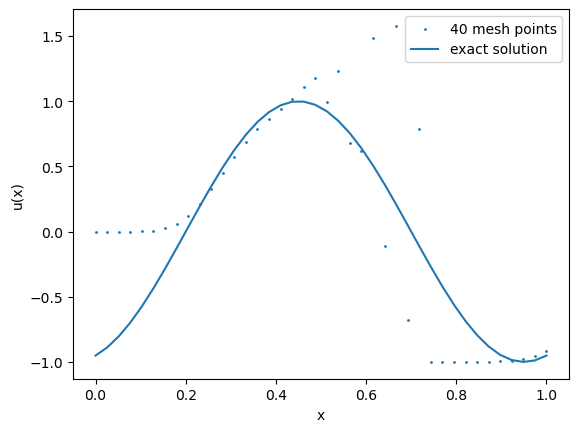

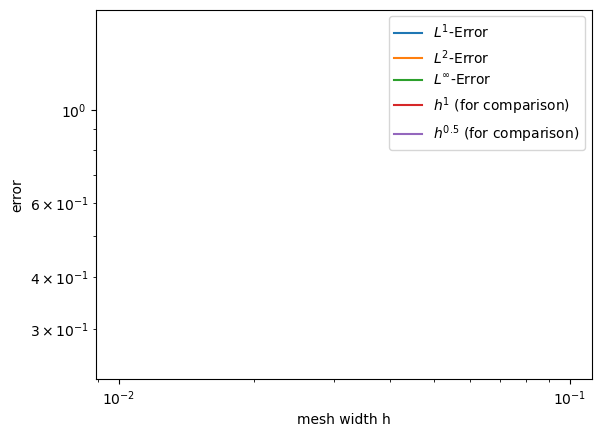

L1 average convergence rate: 0.15091324480214838
L2 average convergence rate: 0.09860407276618816
Linf average convergence rate: -0.04267257781244093
N=40
L1 Error at N=40: 0.3284398587488001
L2 Error  at N=40: 0.4831263447330383
Linf Error at N=40: 1.3700236344201282


/tmp/ipykernel_16322/3134562115.py:67: RankWarning: Polyfit may be poorly conditioned
  print("L1 average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_l1), 1)[0])
/tmp/ipykernel_16322/3134562115.py:68: RankWarning: Polyfit may be poorly conditioned
  print("L2 average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_l2), 1)[0])
/tmp/ipykernel_16322/3134562115.py:69: RankWarning: Polyfit may be poorly conditioned
  print("Linf average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_linf), 1)[0])


In [66]:
def u_exact(x, t):
    return np.sin(2 * np.pi * (x - 2 * t))
    
tend = 0.1
mesh_sizes = np.array([40])
err_l1 = np.zeros(n := len(mesh_sizes))
err_l2 = np.zeros(n)
err_linf = np.zeros(n)
numerical_solutions = []

def f(u):
    return 2*u

def godunov_flux_local(u_left, u_right):
    if u_left <= u_right:
        return f(u_left)
    else:
        return f(u_right)

#takes in all values of u = (u_j^n)_j at time n and returns vector of fluxes (F_{j+1/2})_j

def godunov_flux(u):
    u0 = u[0]-(u[1]-u[0])
    u_left = np.concatenate(([u[0]], u))
    u_right =np.concatenate((u, [u[-1]]))
    is_smaller = (u_left <= u_right)
    return is_smaller*f(u_left)+(1-is_smaller)*f(u_right)

for i, N in enumerate(mesh_sizes):
    dx = 1 / N
    #choosing dt according to CFL condition
    dt = 1 / (4 * N)  # <= 1/(2N)

    x = np.linspace(0, 1, N)
    # Initial values:
    u = np.sin(2 * np.pi * x)
    for _ in range(int(tend / dt)):
        F_j_minus = godunov_flux(u)
        print(F_j_minus)
        F_j_diff = F_j_minus[1:]-F_j_minus[:-1]
        u = u - dt/dx*F_j_diff
    numerical_solutions.append(u)
    err_l1[i] = np.sum(np.abs(u - u_exact(x, tend))) * dx
    err_l2[i] = np.sqrt(np.sum((np.abs(u - u_exact(x, tend))) ** 2) * dx)
    err_linf[i] = np.max(np.abs(u - u_exact(x, tend)))

# Plotting:
for i, N in enumerate(mesh_sizes):
    plt.scatter(np.linspace(0, 1, N), numerical_solutions[i], label=f"{N} mesh points", s=1)

plt.xlabel("x")
plt.ylabel("u(x)")
plt.plot(x := np.linspace(0, 1, mesh_sizes[-1]), u_exact(x, tend), label="exact solution")
plt.legend()
plt.show()
mesh_widths = 1 / mesh_sizes
plt.loglog(mesh_widths, err_l1, label="$L^{1}$-Error")
plt.loglog(mesh_widths, err_l2, label="$L^{2}$-Error")
plt.loglog(mesh_widths, err_linf, label="$L^{\infty}$-Error")
plt.loglog(mesh_widths, 10 * mesh_widths, label="$h^{1}$ (for comparison)")
plt.loglog(mesh_widths, 10 * mesh_widths ** 0.5, label="$h^{0.5}$ (for comparison)")
plt.xlabel("mesh width h")
plt.ylabel("error")
plt.legend()
plt.show()

print("L1 average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_l1), 1)[0])
print("L2 average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_l2), 1)[0])
print("Linf average convergence rate:", np.polyfit(np.log(mesh_widths), np.log(err_linf), 1)[0])

print(f"N={mesh_sizes[0]}")
print(f"L1 Error at N={mesh_sizes[0]}: {err_l1[0]}")
print(f"L2 Error  at N={mesh_sizes[0]}: {err_l2[0]}")

print(f"Linf Error at N={mesh_sizes[0]}: {err_linf[0]}")

for i, N in enumerate(mesh_sizes[1:]):
    print(f"N={N}")
    print(f"L1 Error at N={N}:", err_l1[i + 1])
    print(f"L2 Error  at N={N}:", err_l2[i + 1])
    print(f"Linf Error at N={N}:", err_linf[i + 1])
    print(f"L1 local convergence rate at N={N} :",
          np.polyfit(np.log(mesh_widths[i:i + 2]), np.log(err_l1[i:i + 2]), 1)[0])
    print(f"L2 local convergence rate  at N={N}:",
          np.polyfit(np.log(mesh_widths[i:i + 2]), np.log(err_l2[i:i + 2]), 1)[0])
    print(f"Linf local  convergence rate at N={N}:",
          np.polyfit(np.log(mesh_widths[i:i + 2]), np.log(err_linf[i:i + 2]), 1)[0])
